#Data Intelligence Challenge
## Assignment 3

In [1]:
# Execute this code when running on Google Colab
# Make sure you uploaded the code folder 2AMC15 on Google Drive in a folder Data Intelligence Challenge (see ReadMe)

from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("drive/MyDrive/Data Intelligence Challenge/2AMC15")

!pip install keras-rl
!pip install stable-baselines3
!pip install stable-baselines



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from continuous_environment import GymEnv, Robot
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv

from stable_baselines3 import PPO, A2C
from stable_baselines3.common.utils import set_random_seed
import gym
import time

from typing import Callable


### Training

Trains the algorithm for 100 epochs with each epoch consisting of 600 timesteps or after two hours to limit training. After each 600 timesteps the model is saved.

After a run is completed the amoumt of steps taken and dirty percentage at the end is printed:

```
{n_steps} {dirty_percentage}
RESET!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
```

After each epoch an overview of the epoch results is shown with EP_REW_MEAN indicating what the average rewards was on that epoch and thus giving an indication of performance.


```
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 150         |
|    ep_rew_mean          | 675         |
|    ...                  | ...         |
-----------------------------------------
```

The three tested maps tiny, living and bunker are provided

RESET!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


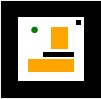

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


/usr/local/lib/python3.7/dist-packages/stable_baselines3/ppo/ppo.py:141: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 300`, after every 4 untruncated mini-batches, there will be a truncated mini-batch of size 44
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=300 and n_envs=1)
  f"You have specified a mini-batch size of {batch_size},"


RESET!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


KeyboardInterrupt: ignored

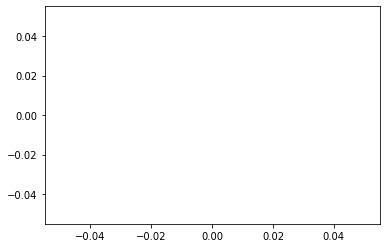

In [6]:
map = "tiny_map.json"
startPos = [[0.5, 1.6]]

map = "living_map.json"
startPos = [[1, 2.8]]

map = "bunker_map.json"
startPos = [[9.5, 1.6]]

# Initialize the environment
env = GymEnv(
      configFile=map,
      robots=[Robot(id=1, radius=0.1, color="green", batteryLevel=100)],
      startingPos=startPos,
      save=False
  )
env.render()

# Set training variables
nr_hours_to_run = 2
nr_train_epochs=100
evaluation_frequency = 50

# Create model
model = PPO("CnnPolicy", env, verbose=1, n_steps=300, learning_rate=0.0001)

start_time = time.time()

for i in range(nr_train_epochs):
  model.learn(total_timesteps=600, eval_log_path="eval", eval_freq=evaluation_frequency)
  model.save(f"RL_agent_{i}")
  
  print("Saving epoch ", i)
  if (time.time() - start_time > 60*60*nr_hours_to_run):
    print("Expended alloted training time")
    break

model.save("RL_agent")



### Evaluation

Allows the evaluation of model by running them for 1 epoch, and displaying the results similarly to training. The images can be found in the folder of the same name in either in Drive or locally.

As models take a long time to run, we provide three pre-trained models tiny, living and bunkertoren are provided with their respective map, starting position, battery size


*Warning: living_map.json can somethings bug out and report no geoms in polygon, you should retry*

RESET!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


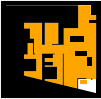

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
RESET!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


KeyboardInterrupt: ignored

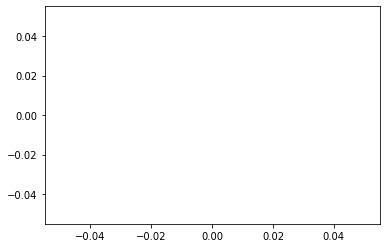

In [7]:
# Maps, battery size, starting position and pretrained agents
eval_map = "tiny_map.json"
eval_model = "RL_agent_tiny_11"
startPos = [[0.5, 1.6]]
battery_size = 20

eval_map = "living_map.json"
eval_model = "RL_agent_living_8"
startPos = [[1, 2.8]]
battery_size = 40

eval_map = "bunker_map.json"
eval_model = "RL_agent_bunker_3"
startPos = [[9.5, 1.6]]
battery_size = 100

env = GymEnv(
      configFile=eval_map,
      robots=[Robot(id=1, radius=0.1, color="green", batteryLevel=battery_size)],
      startingPos=startPos,
      save=True
)
env.render()

evaluation_frequency = 50

# Create model
model = PPO.load(eval_model, env)

model.learn(total_timesteps=150, eval_log_path="eval", eval_freq=evaluation_frequency)

